<a href="https://colab.research.google.com/github/thak123/winter-school-ffzg-2023/blob/main/1_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Lets say hello

In [ ]:
print("hello world")

In [ ]:
!python -V

## 2. Requirements

### Installing packages

In [ ]:
pip install -U scikit-learn pandas numpy matplotlib gensim  POT

## 3. Importing the libraries

In [ ]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pickle
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 3.a. Code to download data file

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time




In [ ]:
# categories = [
#     "alt.atheism",
#     "comp.graphics",
#     "comp.sys.ibm.pc.hardware",
#     "comp.sys.mac.hardware",
#     "comp.windows.x",
#     "misc.forsale",
#     "rec.autos",
#     "rec.motorcycles",
#     "rec.sport.baseball",
#     "rec.sport.hockey",
#     "sci.crypt",
#     "sci.electronics",
#     "sci.med",
#     "sci.space",
#     "soc.religion.christian",
#     "talk.politics.guns",
#     "talk.politics.mideast",
#     "talk.politics.misc",
#     "talk.religion.misc",
# ]

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

In [ ]:
# newsgroup_data = fetch_20newsgroups(
#         subset="all",
#         categories=categories,
#         shuffle=True,
#         random_state=42,
#     )

data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        # remove=remove,
    )

data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        # remove=remove,
    )
  

In [ ]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

# split target in a training set and a test set
y_train, y_test = data_train.target, data_test.target



In [ ]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
def preprocess(X):
    documents = []
    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))
        
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        
        # Converting to Lowercase
        document = document.lower()
        
        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        
        documents.append(document)
    return documents

In [ ]:
train_documents = preprocess(data_train.data)
test_documents = preprocess(data_test.data)

In [ ]:
len(train_documents),len(test_documents)

In [ ]:
# Extracting features from the training data using a sparse vectorizer
# vectorizer = TfidfVectorizer(
#     sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
# )
# X_train = vectorizer.fit_transform(data_train.data)

# # Extracting features from the test data using the same vectorizer
# X_test = vectorizer.transform(data_test.data)

# feature_names = vectorizer.get_feature_names_out()

In [ ]:
train_documents

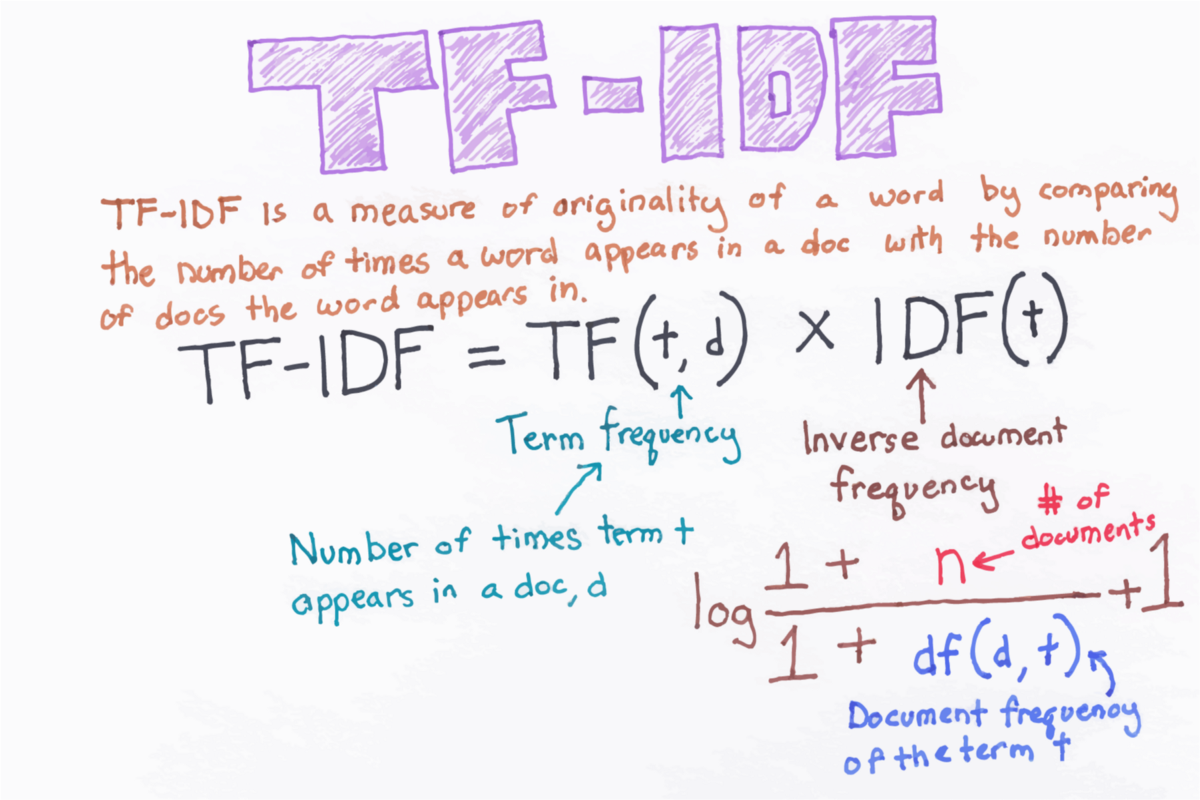

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(train_documents).toarray()

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(X_train).toarray()

In [ ]:
X_test = vectorizer.transform(test_documents).toarray()
X_test = tfidfconverter.transform(X_test).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# vectorizer = TfidfVectorizer (max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X_train = vectorizer.fit_transform(train_documents).toarray()
X_test = vectorizer.transform(test_documents).toarray()

In [ ]:
#TODO Change classifier here
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
# import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {text_classifier.__class__.__name__}\non the original documents"
)

# Excercise 

## 1. Increase the number of classes and recheck the performance matrices

## 2. Try changing the values in the tf idf vectoriser and rechec the performance matrices
- max_features=2500 
- min_df=7 
- max_df=0.8 
- stop_words=stopwords.words('english')

## 3. Change different classifiers
- [Naïve Bayes ](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    
- [K-Nearest Neighbors (kNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#classification) 

- Support Vector Machine 



In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing

- Documentation - [MLP - Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [ ]:
clf = MLPClassifier(alpha=1e-5,
                    # hidden_layer_sizes=(5, 4),
                    hidden_layer_sizes=(150,100,50),
                    early_stopping= True,
                    max_iter=300,
                    random_state=1)
clf.fit(X_scaled, y_train)
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
## he vector representations

In [ ]:
import multiprocessing
import gensim.downloader
from gensim.models import word2vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')



In [ ]:
list(gensim.downloader.info()['models'].keys())

In [ ]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [ ]:
glove_vectors.most_similar('twitter')

In [ ]:
# Print results
print("Cosine similarity:", glove_vectors.similarity("alice","wonderland"))

In [ ]:
for index, word in enumerate(glove_vectors.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(glove_vectors.index_to_key)} is {word}")

In [ ]:
vec_king = glove_vectors['king']

In [ ]:
vec_king

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, glove_vectors.similarity(w1, w2)))

In [ ]:
print(glove_vectors.most_similar(positive=['car', 'minivan'], topn=5))

In [ ]:
print(glove_vectors.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

In [ ]:
glove_vectors.most_similar(positive=["woman", "queen"], negative=["king"], topn=3)

In [ ]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()


In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
sentence_obama = [w for w in sentence_obama if w not in STOPWORDS]
sentence_president = [w for w in sentence_president if w not in STOPWORDS]

In [ ]:
distance = glove_vectors.wmdistance(sentence_obama, sentence_president)
print(f"Word Movers Distance is {distance} (lower means closer)")

In [ ]:
# TODO can be taken up as excercise
# fast_text_vectors = gensim.downloader.load("fasttext-wiki-news-subwords-300")

## Not all words are present in the word2vec

In [ ]:
try:
    vec_cameroon = glove_vectors['cameroon2']
except KeyError:
    print("The word 'cameroon2' does not appear in this model")

In [ ]:
def preprocess_word2vec(X):
    documents = []
    for sen in range(0, len(X)):
        document = gensim.utils.simple_preprocess(X[sen])
        documents.append(document)
    return documents

In [ ]:
data_train.data[0]

In [ ]:
# Clean data using the built in cleaner in gensim

X_train = preprocess_word2vec(data_train.data)
X_test = preprocess_word2vec(data_test.data)

In [ ]:
X_train[0]

In [ ]:

# w2v_model = gensim.downloader.load('word2vec-google-news-300')
w2v_model = gensim.downloader.load('glove-twitter-25')

In [ ]:
w2v_model.index_to_key 

In [ ]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
# Replace the words in each text message with the learned word vector
words = set(w2v_model.index_to_key )
X_train_vect = np.array([np.array([w2v_model[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model[i] for i in ls if i in words])
                         for ls in X_test])

In [ ]:
X_train_vect[0]

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
X_train_vect_avg[0].shape

In [ ]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_train_vect_avg):
    print("", len(v))

In [ ]:
# Instantiate and fit a basic Random Forest model on top of the vectors
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.ravel())

In [ ]:
# Use the trained model to make predictions on the test data
predictions = rf_model.predict(X_test_vect_avg)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))